In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
SEED = 1234
NUM_SAMPLES = 200

In [69]:
np.random.seed(SEED)

In [70]:
def generate_data(no_samples):
    X = np.array(range(NUM_SAMPLES))
    noise = np.random.uniform(-10,20,size = NUM_SAMPLES)
    y = 3.5*X + noise
    return X,y

In [71]:
X,y = generate_data(NUM_SAMPLES)

In [73]:
data = np.array(list(zip(X,y)))

In [74]:
df = pd.DataFrame(data, columns=["X", "y"])

In [75]:
X = df[["X"]].values
y = df[["y"]].values

In [81]:
df.head()

,X,y
0,0.0,-4.254416
1,1.0,12.163263
2,2.0,10.131832
3,3.0,24.060758
4,4.0,27.399274


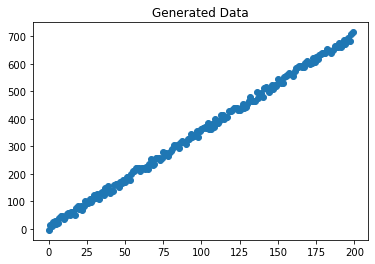

In [82]:
plt.title('Generated Data')
plt.scatter(x= df['X'],y= df['y'])
plt.show()

## Split Data

In [83]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [84]:
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [85]:
TRAIN_START = 0
TRAIN_END = int(TRAIN_SIZE*NUM_SAMPLES)
VAL_START = TRAIN_END
VAL_END = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
TEST_START = VAL_END
TEST_END = NUM_SAMPLES

In [86]:
X_train = X[TRAIN_START:TRAIN_END]
y_train = y[TRAIN_START:TRAIN_END]
X_val = X[VAL_START:VAL_END]
y_val = y[VAL_START:VAL_END]
X_test = X[TEST_START:TEST_END]
y_test = y[TEST_START:TEST_END]

In [88]:
def standardize_data(data, mean, std):
    return (data - mean)/std

In [89]:
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

In [90]:
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

## CREATING A MODEL

In [91]:
INPUT_DIM = X_train.shape[1] # X is 1-dimensional
OUTPUT_DIM = y_train.shape[1] # y is 1-dimensional

In [113]:
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)    # (coz we need to multiply the matrix this shape is imp)
b = np.zeros((1,1))

In [114]:
print(W,"----------",b)

[[0.00260593]] ---------- [[0.]]


In [115]:
y_pred = np.dot(X_train, W) + b   #  (140 x 1) . (1 x 1) = (140 x 1) +  b(added to all)

### Calculating Loss

In [116]:
N = X_train.shape[0]
rms = (1/N)*np.sum((y_pred-y_train)**2)
print(f"RMS: {rms:.3f}")

RMS: 0.995


In [117]:
# Backpropagation
dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
db = -(2/N) * np.sum((y_train - y_pred) * 1)

In [118]:
LEARNING_RATE = 1e-1

In [119]:
# Update weights
W += -LEARNING_RATE * dW
b += -LEARNING_RATE * db

In [125]:
NUM_EPOCHS = 100

In [126]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, 1))
# Training loop
for epoch_num in range(NUM_EPOCHS):

    ## FORWARD PASS
    y_pred = np.dot(X_train,W) + b

    ## CALCULATE LOSS
    N = X_train.shape[0]
    loss = (1/N)*np.sum((y_pred-y_train)**2)

    # Backpropagation
    dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
    db = -(2/N) * np.sum((y_train - y_pred) * 1)

    # Update weights
    W += -LEARNING_RATE * dW
    b += -LEARNING_RATE * db

    # Show Loss w.r.t epoch
    if epoch_num%20 == 0:
        print (f"Epoch: {epoch_num}, loss: {loss:.3f}")


Epoch: 0, loss: 0.985
Epoch: 20, loss: 0.002
Epoch: 40, loss: 0.002
Epoch: 60, loss: 0.002
Epoch: 80, loss: 0.002


In [127]:
pred_train = W*X_train + b
pred_test = W*X_test + b

In [128]:
# Train and test MSE
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print (f"train_MSE: {train_mse:.2f}, test_MSE: {test_mse:.2f}")

train_MSE: 0.00, test_MSE: 0.00


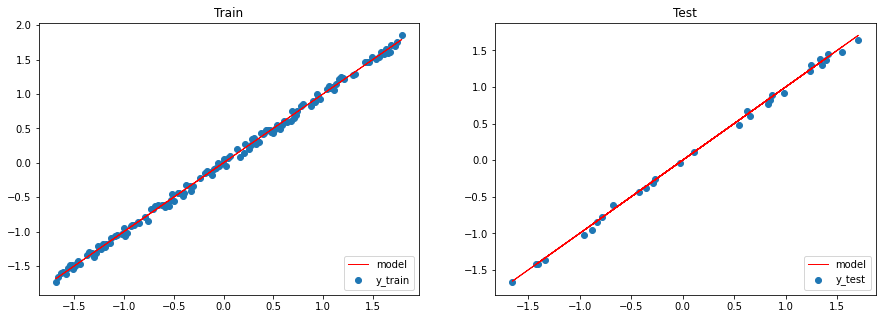

In [129]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Show plots
plt.show()


### Unscaled Weights

In [136]:
W_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mean - np.sum(W_unscaled*X_mean)
print ("[actual] y = 3.5X + noise")
print (f"[model] y_hat = {W_unscaled[0][0]:.2f} X + {b_unscaled[0][0]:.2f}")

[actual] y = 3.5X + noise
[model] y_hat = 3.50 X + 6.73
